In [1]:
cd ../analysis/

/srv/data/home/jlee782/final_segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from withClustAnalysis import *
from PixelEM import * 

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile MV PRJ result from each cluster to CSV
MV_df = compile_cluster_MV_prj_into_csv()
# Pick best clusters for each object sample based on MV
best_clust_df = best_worker_picking()
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()
# compile the best threshold PRJs into one big table with algo as a column
#df_best_thresh = compile_best_thresh_all_algo_PRJs()
# Extracting important clusters only
# best_clust_best_thresh_df = filter_best_clust(df_best_thresh,best_clust_df)
best_clust_best_thresh_df  = filter_best_clust(df,best_clust_df)

In [4]:
# #exclude small area objects
# small_area=[11,15]

# best_clust_best_thresh_df= best_clust_best_thresh_df[~best_clust_best_thresh_df.objid.isin(small_area)]
# best_clust_no_thresh_df= best_clust_no_thresh_df[~best_clust_no_thresh_df.objid.isin(small_area)]

In [5]:
MV_df[(MV_df["num_workers"]==5)&(MV_df["sample_num"]==9)&(MV_df["objid"]==4)]

,MV_jaccard,MV_precision,MV_recall,clust,num_workers,objid,sample_num
102,0.894064,0.934402,0.953939,0,5,4,9
103,0.432050,0.447770,0.924848,1,5,4,9
91,0.900831,0.943277,0.952424,-1,5,4,9


In [6]:
best_clust_best_thresh_df[(best_clust_best_thresh_df["num_workers"]==5)&(best_clust_best_thresh_df["sample_num"]==9)&(best_clust_best_thresh_df["objid"]==4)]

,J [MV],P [MV],R [MV],clust,num_workers,objid,sample_num,P [basic],R [basic],J [basic],...,J [GT],P [isoGT],R [isoGT],J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA]
24,0.894064,0.934402,0.953939,0,5,4,9,0.934402,0.953939,0.894064,...,0.894064,0.934164,0.954545,0.894378,0.934086,0.953333,0.893242,0.934164,0.954545,0.894378
371,0.900831,0.943277,0.952424,-1,5,4,9,0.943277,0.952424,0.900831,...,0.900831,0.950874,0.956061,0.911060,0.948710,0.958485,0.911265,0.950874,0.956061,0.911060


### Performance as it varies with number of workers

In [7]:
# MV should be the same, whether best thresh picked or not (since MV indept of thresh)
# assert best_clust_best_thresh_df[best_clust_best_thresh_df["algo"]=="MV"]["j"].mean() == best_clust_no_thresh_df["J [MV]"].mean()

#best_thres_best_clust_df[["objid","J [GTLSA]"]]#.objid.unique()#.groupby("num_workers")["J [MV]"]

In [8]:
clustObj=clust_df.objid.unique()

In [9]:
best_clust_best_thresh_df = best_clust_best_thresh_df[((best_clust_best_thresh_df["clust"]==-1) &(best_clust_best_thresh_df["objid"].isin(noClust_obj))) |best_clust_best_thresh_df["objid"].isin(clustObj)]

In [12]:
# data[(data["num_workers"]==5)&(data["sample_num"]==9)]#&(data["objid"]==4)]

In [13]:
# MV[MV["objid"]==1]
# MV[(MV["num_workers"]==5)&(MV["sample_num"]==9)&(MV["objid"]==1)]

# data[(data["num_workers"]==5)&(data["sample_num"]==9)&(data["objid"]==1)]

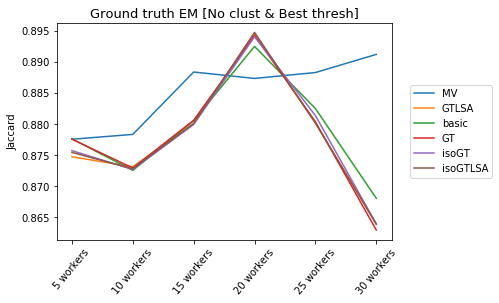

In [46]:
gt=""
MV = pd.read_csv("pixel_em/all_MV_PRJ_table.csv") 
MV = MV[MV["clust"]==-1]
MV_noClust = MV.groupby("num_workers").mean()["MV_jaccard"]
plt.plot(MV_noClust,label="MV")

for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
    data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
    data = data[data["clust"]==-1]
    plt.plot(data.groupby("num_workers").mean()["EM_jaccard"],label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [No clust & Best thresh]",fontsize=13)

In [50]:
data.groupby(["num_workers","sample_num"]).count()["EM_jaccard"]

num_workers  sample_num
5            0             44
             1             44
             2             44
             3             44
             4             44
             5             44
             6             44
             7             44
             8             44
             9             44
10           0             44
             1             44
             2             44
             3             15
             4             14
             5             11
             6             14
             7             12
15           0             44
             1             44
             2              7
             3              7
             4              8
             5              7
20           0             27
             1             27
             2              4
             3              5
25           0             22
             1             20
30           0             12
Name: EM_jaccard, dtype: int64

In [20]:
clustObj=clust_df.objid.unique()

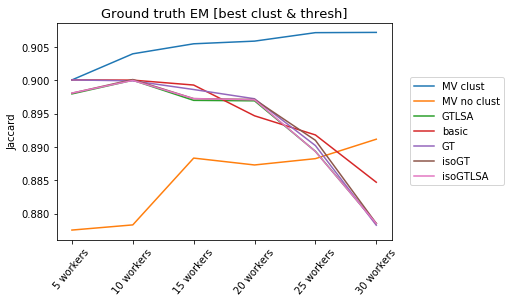

In [52]:
gt=""
MV = pd.read_csv("pixel_em/all_MV_PRJ_table.csv") 
# now need to filter based on best cluster
MV = filter_best_clust(MV,best_clust_df)
# select only the best cluster if clustered object -1 if not clustered
MV = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]

#MV[(MV["num_workers"]==5)&(MV["sample_num"]==9)].sort("objid")
plt.plot(MV.groupby("num_workers").mean()["MV_jaccard"],label="MV clust")
plt.plot(MV_noClust,label="MV no clust")

for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
    # we only ran on the best clusters, so the results should only be on the best clusters if not -1
    data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
    data = data[((data["clust"]==-1) &(data["objid"].isin(noClust_obj)))| ((data["clust"]!=-1) & data["objid"].isin(clustObj))]
    plt.plot(data.groupby("num_workers").mean()["EM_jaccard"],label=algo)
    assert len(data.objid.unique())==len(object_lst)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & thresh]",fontsize=13)

In [53]:
data.groupby(["num_workers","sample_num"]).count()["EM_jaccard"]

num_workers  sample_num
5            0             44
             1             44
             2             44
             3             44
             4             44
             5             44
             6             44
             7             44
             8             44
             9             44
10           0             44
             1             44
             2             44
             3              9
             4              9
             5              6
             6              9
             7              7
15           0             24
             1             21
             2              4
             3              4
             4              4
             5              4
20           0             14
             1             14
             2              2
             3              3
25           0             12
             1             12
30           0              7
Name: EM_jaccard, dtype: int64

In [11]:
algo="isoGTLSA"
data =  pd.read_csv("pixel_em/{}{}_full_PRJ_table.csv".format(gt,algo))
data[data["num_workers"]==30]

,num_workers,sample_num,objid,thresh,clust,EM_precision,EM_recall,EM_jaccard
444,30,0,1,best,-1,0.987981,0.979453,0.967920
445,30,0,2,best,-1,0.962261,0.984082,0.947513
446,30,0,3,best,-1,0.963536,0.915966,0.885279
447,30,0,4,best,-1,0.950045,0.950909,0.905628
448,30,0,5,best,-1,0.963981,0.892319,0.863528
449,30,0,6,best,-1,0.922039,0.879828,0.818908


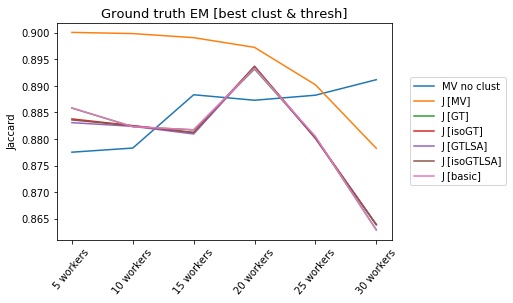

In [11]:
Nworker_performance = best_clust_best_thresh_df.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering
MV = pd.read_csv("pixel_em/MV_PRJ_table.csv") 
MV_noClust = np.array(MV.groupby("num_workers").mean()["MV_jaccard"])
plt.plot(MV_noClust,label="MV no clust")

for algo in metric_J:
    plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & thresh]",fontsize=13)

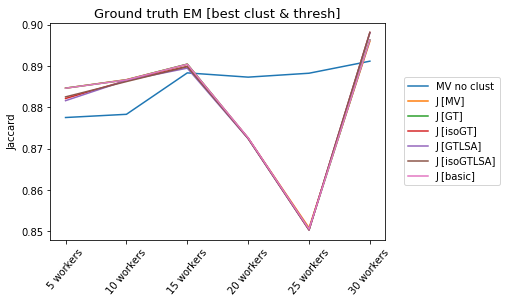

In [22]:
Nworker_performance = best_clust_best_thresh_df.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering
MV = pd.read_csv("pixel_em/MV_PRJ_table.csv") 
MV_noClust = np.array(MV.groupby("num_workers").mean()["MV_jaccard"])
plt.plot(MV_noClust,label="MV no clust")

for algo in metric_J:
    plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & thresh]",fontsize=13)

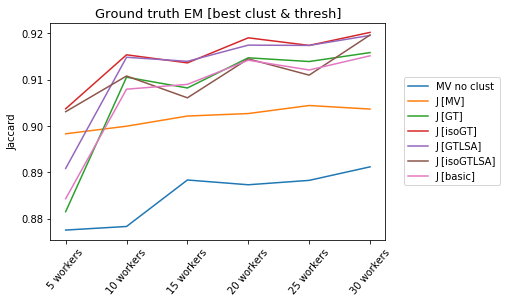

In [11]:
Nworker_performance = best_clust_best_thresh_df.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering
MV = pd.read_csv("pixel_em/MV_PRJ_table.csv") 
MV_noClust = np.array(MV.groupby("num_workers").mean()["MV_jaccard"])
plt.plot(MV_noClust,label="MV no clust")

for algo in metric_J:
    plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Ground truth EM [best clust & thresh]",fontsize=13)

In [12]:
print "isoGTLSA_best_clust_thresh=",list(Nworker_performance['J [isoGTLSA]'])
print "isoGT_best_clust_thresh=",list(Nworker_performance['J [isoGT]'])

isoGTLSA_best_clust_thresh= [0.90307821216941164, 0.91078223067499475, 0.90607202115964414, 0.91447871328211938, 0.91096930916946339, 0.91962648032280192]
isoGT_best_clust_thresh= [0.90370842070887658, 0.91535647767820261, 0.91361309274310576, 0.9190222529098161, 0.9173854347631728, 0.92019369603060786]
